In [155]:
import pandas as pd
import numpy as np

In [156]:
df = pd.read_csv('alturas-pesos-train.csv')

In [157]:
df[:10]

,Genero,Peso,Altura
0,Mujer,60,160
1,Hombre,95,180
2,Hombre,75,170
3,Mujer,55,160
4,Mujer,55,150
5,Mujer,60,160
6,Hombre,80,175
7,Mujer,70,170
8,Mujer,55,155
9,Hombre,85,180


In [158]:
len(df)

8000

# Modelos en Machine Learning
- Generación
- Clasificación
- Regresión

# Tenemos 3 V.A: Género, Peso, Altura

## Género: V.A de Bernoulli

In [161]:
genero = df['Genero']
print(genero)

0        Mujer
1       Hombre
2       Hombre
3        Mujer
4        Mujer
5        Mujer
6       Hombre
7        Mujer
8        Mujer
9       Hombre
10       Mujer
11      Hombre
12      Hombre
13       Mujer
14       Mujer
15      Hombre
16       Mujer
17       Mujer
18       Mujer
19       Mujer
20       Mujer
21       Mujer
22       Mujer
23      Hombre
24      Hombre
25      Hombre
26      Hombre
27       Mujer
28       Mujer
29       Mujer
         ...  
7970     Mujer
7971     Mujer
7972     Mujer
7973    Hombre
7974    Hombre
7975    Hombre
7976    Hombre
7977     Mujer
7978    Hombre
7979     Mujer
7980    Hombre
7981    Hombre
7982    Hombre
7983    Hombre
7984     Mujer
7985     Mujer
7986     Mujer
7987    Hombre
7988     Mujer
7989    Hombre
7990     Mujer
7991    Hombre
7992    Hombre
7993    Hombre
7994    Hombre
7995     Mujer
7996    Hombre
7997    Hombre
7998     Mujer
7999    Hombre
Name: Genero, Length: 8000, dtype: object


### Cual es el parámetro p?

In [162]:
p_hombre = (genero == 'Hombre').sum()/len(genero)
p_mujer = (genero == 'Mujer').sum()/len(genero)
print(p_hombre, p_mujer)

0.50025 0.49975


In [163]:
from matplotlib import pyplot as plt

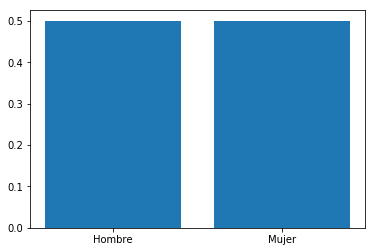

In [164]:
plt.bar(['Hombre', 'Mujer'], [0.50025, 0.49975])
plt.show()

Espacio muestral:

In [165]:
['Hombre', 'Mujer']

['Hombre', 'Mujer']

## Peso: V.A categórica

In [166]:
from collections import Counter

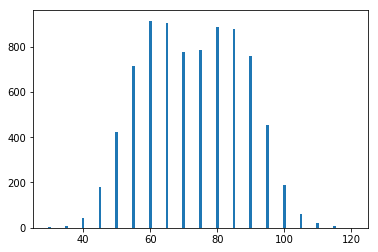

In [168]:
peso =  df['Peso']
peso_frecuencia = dict(Counter(peso))
plt.bar(peso_frecuencia.keys(), peso_frecuencia.values())
plt.show()

In [170]:
peso_frecuencia[65]

903

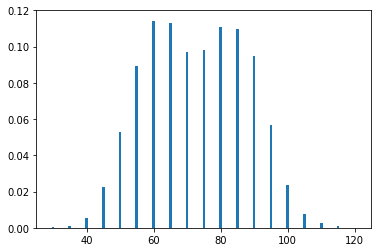

In [178]:
peso_prob = {pe:c/len(peso) for pe, c in peso_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

In [179]:
peso_prob[65]

0.112875

Espacio Muestral:

In [174]:
np.sort(list(peso_prob.keys()))

array([ 30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,
        95, 100, 105, 110, 115, 120])

## Altura: V.A categórica

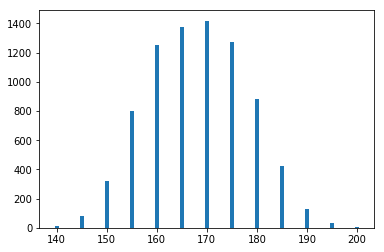

In [180]:
altura =  df['Altura']
altura_frecuencia = dict(Counter(altura))
plt.bar(altura_frecuencia.keys(), altura_frecuencia.values())
plt.show()

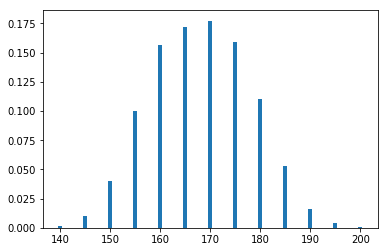

In [181]:
altura_prob = {al:c/len(altura) for al, c in altura_frecuencia.items()}
plt.bar(altura_prob.keys(), altura_prob.values())
plt.show()

Espacio muestral

In [182]:
np.sort(list(altura_frecuencia.keys()))

array([140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])

# V.A Marginales
Cada V.A independiente de los valores que toman las otras

# Modelos generadores:

In [183]:
peso_gen = np.random.choice(list(peso_prob.keys()), size = 100, p = list(peso_prob.values()))
print(peso_gen)

[ 65  60  80  65  85  85  65  80  80  80  50  70  85  85  60  65  90  60
  60  75  60 100  70  60  75  75  70  80  95  95  75  85  90  65  75  75
  85  80  90  85  60  85  55  60  85  85  55  75  65  90  75  75  90  75
  65  80  90  90  60  60  95  50  85  85  95  90  75  55  90  55  90  75
  80  60  90  90  55  60  60  65  80  80  95  45  95  95  65  70  80  70
  60  65  70  50  60  65  65 100  95  55]


In [184]:
alt_gen = np.random.choice(list(altura_prob.keys()), size = 100, p = list(altura_prob.values()))
print(alt_gen)

[195 175 170 170 165 170 160 175 180 175 185 175 170 160 185 185 170 160
 165 160 160 180 170 175 160 175 165 155 165 175 165 170 175 170 150 160
 190 170 180 155 160 165 165 160 175 175 170 145 160 155 165 155 175 160
 180 165 155 165 160 155 175 160 180 165 170 160 170 160 165 165 185 165
 175 185 170 155 170 165 185 170 145 160 165 185 160 160 165 160 160 155
 155 160 170 160 160 170 180 155 175 175]


### Tiene sentido ahora armar conjunto de pesos, alturas generando de esta forma?

In [153]:
pesos_alts = np.array([list(peso_gen), list(alt_gen)]).T
pesos_alts[:10]

array([[ 70, 155],
       [ 70, 170],
       [ 75, 170],
       [ 65, 180],
       [ 50, 165],
       [ 45, 180],
       [ 75, 170],
       [ 50, 160],
       [ 60, 160],
       [ 50, 175]])

In [101]:
ap = pd.read_csv('alturas-pesos-mils-train.csv')

In [102]:
pesos_rounded = (np.round(ap['Peso'].values/5)*5).astype(int)
alturas_rounded = (np.round(ap['Altura'].values/5)*5).astype(int)

In [103]:
alturas_rounded

array([160, 180, 170, ..., 170, 165, 170])

In [104]:
ap_rounded = ap.copy()

In [105]:
ap_rounded['Peso'] = pesos_rounded
ap_rounded['Altura'] = alturas_rounded

In [106]:
ap_final = ap_rounded[['Genero','Peso', 'Altura']].copy()

In [107]:
ap_final.to_csv('alturas-pesos-train.csv',index=False)